In [1]:
import pandas as pd
import seaborn as sns
import json

from sklearn.manifold import (
    MDS,
    TSNE,
    Isomap,
    LocallyLinearEmbedding,
    SpectralEmbedding,
)
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px

# CORONA

In [31]:
freq = "4epochs"
study = "corona"
with open(f"../config/features.txt") as f:
    features = json.load(f)

FEATURES = features[study][freq]
OVERIDDEN_FEATURES = [
    "heart_rate_variability_avg",
    "stepsx1000:total",
    "steps:night",
    "steps:morning",
    "steps:afternoon",
    "steps:evening",
    "tst",
    "midsleep",
]
id_cols = ["subject_id", "date", "dayofweek"]
raw_behavior_vector = pd.read_csv(
    f"/m/cs/work/luongn1/digirhythm/data/processed/corona/vector_corona_{freq}.csv",
    index_col=0,
)

raw_behavior_vector.dropna(subset=FEATURES, inplace=True)
raw_behavior_vector["date"] = pd.to_datetime(raw_behavior_vector["date"])
raw_behavior_vector["dayofweek"] = raw_behavior_vector["date"].apply(
    lambda x: "weekday" if x.weekday() < 5 else "weekend"
)

behavior_vector = raw_behavior_vector[FEATURES + id_cols]
behavior_vector = (
    behavior_vector.groupby(["subject_id", "dayofweek"])
    .median(numeric_only=True)
    .reset_index()
)
behavior_vector

,subject_id,dayofweek,heart_rate_variability_avg:norm,stepsx1000:total:norm,steps:night:norm,steps:morning:norm,steps:afternoon:norm,steps:evening:norm,tst:norm,midsleep:norm
0,38758730,weekday,0.373333,0.199636,0.000446,0.294043,0.354501,0.342915,0.543171,0.411515
1,38758730,weekend,0.373333,0.173831,0.025180,0.117370,0.435532,0.311570,0.505495,0.526667
2,49285282,weekday,0.338710,0.453290,0.009685,0.211143,0.488594,0.203783,0.415584,0.735032
3,49285282,weekend,0.354839,0.491622,0.010343,0.166263,0.517223,0.279662,0.635065,0.751618
4,91109228,weekday,0.590909,0.235751,0.001836,0.129324,0.313134,0.446722,0.599681,0.253373
...,...,...,...,...,...,...,...,...,...,...
235,4240001906,weekend,0.411111,0.276647,0.014883,0.138808,0.436880,0.304388,0.353612,0.630456
236,4270145196,weekday,0.348837,0.399854,0.001538,0.388754,0.381071,0.208058,0.495690,0.171533
237,4270145196,weekend,0.343023,0.355025,0.002306,0.271806,0.578787,0.108429,0.618534,0.291058
238,4278070280,weekday,0.339623,0.313261,0.006162,0.372292,0.319953,0.314604,0.437037,0.430124


In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
behavior_vector_pca = pca.fit_transform(behavior_vector[FEATURES])

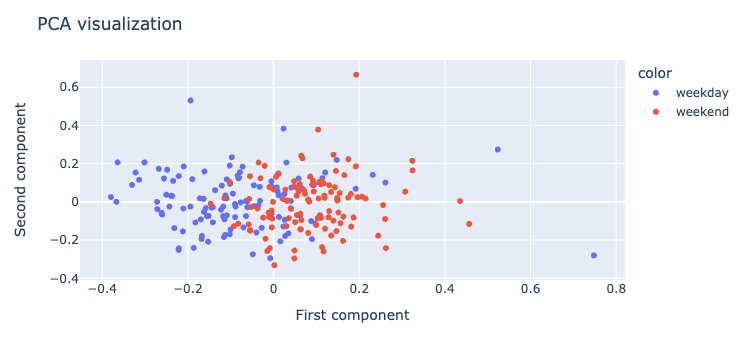

In [45]:
import plotly.express as px

fig = px.scatter(
    x=behavior_vector_pca[:, 0],
    y=behavior_vector_pca[:, 1],
    color=behavior_vector["dayofweek"],
)
fig.update_layout(
    title="PCA visualization",
    xaxis_title="First component",
    yaxis_title="Second component",
)
fig.show()

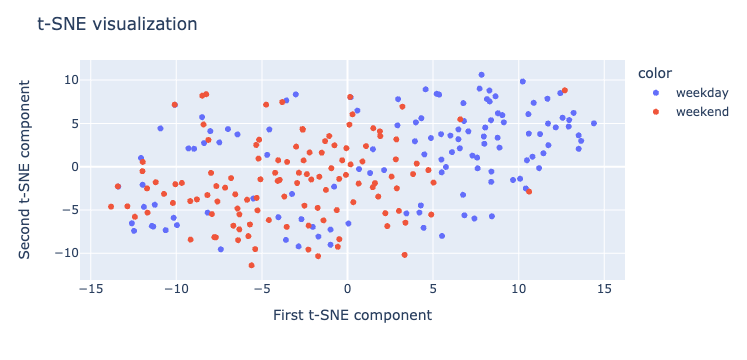

In [29]:
tsne = TSNE(
    n_components=2,
    n_iter=500,
    n_iter_without_progress=150,
    n_jobs=2,
    random_state=0,
)


behavior_vector_tsne = tsne.fit_transform(behavior_vector[FEATURES])

fig = px.scatter(
    x=behavior_vector_tsne[:, 0],
    y=behavior_vector_tsne[:, 1],
    color=behavior_vector["dayofweek"],
)
fig.update_layout(
    title="t-SNE visualization",
    xaxis_title="First t-SNE component",
    yaxis_title="Second t-SNE component",
)
fig.show()

# MOMO

In [11]:
freq = "4epochs"
study = "momo"
with open(f"../config/features.txt") as f:
    features = json.load(f)


FEATURES = features[study][freq]
id_cols = ["user", "device", "group", "date", "dayofweek"]
raw_behavior_vector = pd.read_csv(
    f"/m/cs/work/luongn1/digirhythm/data/processed/momo/vector_momo_{freq}.csv",
    index_col=0,
)

raw_behavior_vector.dropna(subset=FEATURES, inplace=True)
raw_behavior_vector["date"] = pd.to_datetime(raw_behavior_vector["date"])
raw_behavior_vector["dayofweek"] = raw_behavior_vector["date"].apply(
    lambda x: "weekday" if x.weekday() < 5 else "weekend"
)

In [15]:
raw_behavior_vector[FEATURES]

,location:n_sps:norm,location:entropy:norm,location:log_variance:norm,location:proportion_home,application:count:comm:night:norm,application:count:comm:morning:norm,application:count:comm:afternoon:norm,application:count:comm:evening:norm,application:duration:comm:total:norm
650,1.0,0.698555,0.302449,0.410959,0.000000,0.311111,0.200000,0.488889,0.000000
651,0.5,0.000000,0.663186,0.032787,0.096774,0.096774,0.645161,0.161290,1.000000
652,0.5,0.000000,0.582221,0.280000,0.000000,0.390244,0.536585,0.073171,0.017273
653,0.5,0.000000,0.517813,0.125000,0.000000,0.114754,0.426230,0.459016,0.218250
655,0.5,0.000000,0.372991,0.276596,0.000000,0.333333,0.458333,0.208333,0.063519
...,...,...,...,...,...,...,...,...,...
23079,0.5,0.000000,0.097003,0.470588,0.000000,0.166667,0.666667,0.166667,0.006885
23080,0.5,0.000000,0.139960,0.328767,0.000000,0.024390,0.024390,0.951220,0.219037
23081,0.5,0.000000,0.118377,0.234375,0.090909,0.000000,0.272727,0.636364,0.049695
23082,0.5,0.000000,0.099360,0.428571,1.000000,0.000000,0.000000,0.000000,0.050137


In [26]:
tsne = TSNE(
    n_components=2,
    n_iter=500,
    n_iter_without_progress=150,
    n_jobs=2,
    random_state=0,
)

behavior_vector_tsne = tsne.fit_transform(
    behavior_vector[
        [
            "location:n_sps:norm",
            "location:entropy:norm",
            "location:log_variance:norm",
            "location:proportion_home",
            "screen:screen_use_durationtotal:sum:norm",
        ]
    ]
)


fig = px.scatter(
    x=behavior_vector_tsne[:, 2],
    y=behavior_vector_tsne[:, 0],
    color=behavior_vector["dayofweek"],
)
fig.update_layout(
    title="t-SNE visualization",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

In [44]:
import pandas as pd

# Check missing data
fp = "/m/cs/work/luongn1/digirhythm/data/interim/momo/location_4epochs.csv"
loc_df = pd.read_csv(fp, index_col=0)

loc_df.dropna(subset=["location:n_bins"])

,date,device,user,location:dist_total,location:n_bins,location:speed_average,location:speed_variance,location:speed_max,location:variance,location:log_variance,...,location:n_transitions,location:n_top1,location:n_top2,location:n_top3,location:n_top4,location:n_top5,location:entropy,location:normalized_entropy,group,date.1
index,,,,,,,,,,,,,,,,,,,,,
0,2020-03-05,1YfNysXDlFgA,_swxQrt999Wh,71.781959,35.0,0.094921,0.081324,1.346408,2.283467e-09,-19.897571,...,0.0,31.0,0.0,0.0,0.0,0.0,0.000000,0.000000,mmm-bpd,0
1,2020-03-06,1YfNysXDlFgA,_swxQrt999Wh,28648.370691,33.0,1.658357,11.305301,13.619089,3.841770e-03,-5.561822,...,2.0,13.0,5.0,0.0,0.0,0.0,0.000000,0.000000,mmm-bpd,1
2,2020-03-07,1YfNysXDlFgA,_swxQrt999Wh,61571.901456,94.0,3.308958,50.263543,26.685600,2.970338e-02,-3.516494,...,2.0,16.0,7.0,1.0,0.0,0.0,2.772589,4.000000,mmm-bpd,2
3,2020-03-08,1YfNysXDlFgA,_swxQrt999Wh,36131.548273,102.0,1.664093,15.883845,21.779348,9.015095e-03,-4.708855,...,1.0,16.0,3.0,0.0,0.0,0.0,0.000000,0.000000,mmm-bpd,3
4,2020-03-09,1YfNysXDlFgA,_swxQrt999Wh,29043.869031,39.0,1.234567,6.738450,10.709632,3.879500e-03,-5.552049,...,2.0,19.0,3.0,0.0,0.0,0.0,0.000000,0.000000,mmm-bpd,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4363,2021-12-31,zL2u8PjLTiEp,JRmdtSaUsFUc,21629.340298,86.0,1.434593,5.131924,13.150000,5.752862e-04,-7.460643,...,2.0,13.0,4.0,0.0,0.0,0.0,0.000000,0.000000,mmm-control,4363
4364,2022-01-01,zL2u8PjLTiEp,JRmdtSaUsFUc,2822.835820,84.0,1.139881,1.670515,7.900000,1.560505e-07,-15.673086,...,0.0,12.0,0.0,0.0,0.0,0.0,0.000000,0.000000,mmm-control,4364
4365,2022-01-02,zL2u8PjLTiEp,JRmdtSaUsFUc,1916.094612,68.0,1.035735,0.773663,4.290000,1.008176e-07,-16.109953,...,0.0,17.0,0.0,0.0,0.0,0.0,0.000000,0.000000,mmm-control,4365


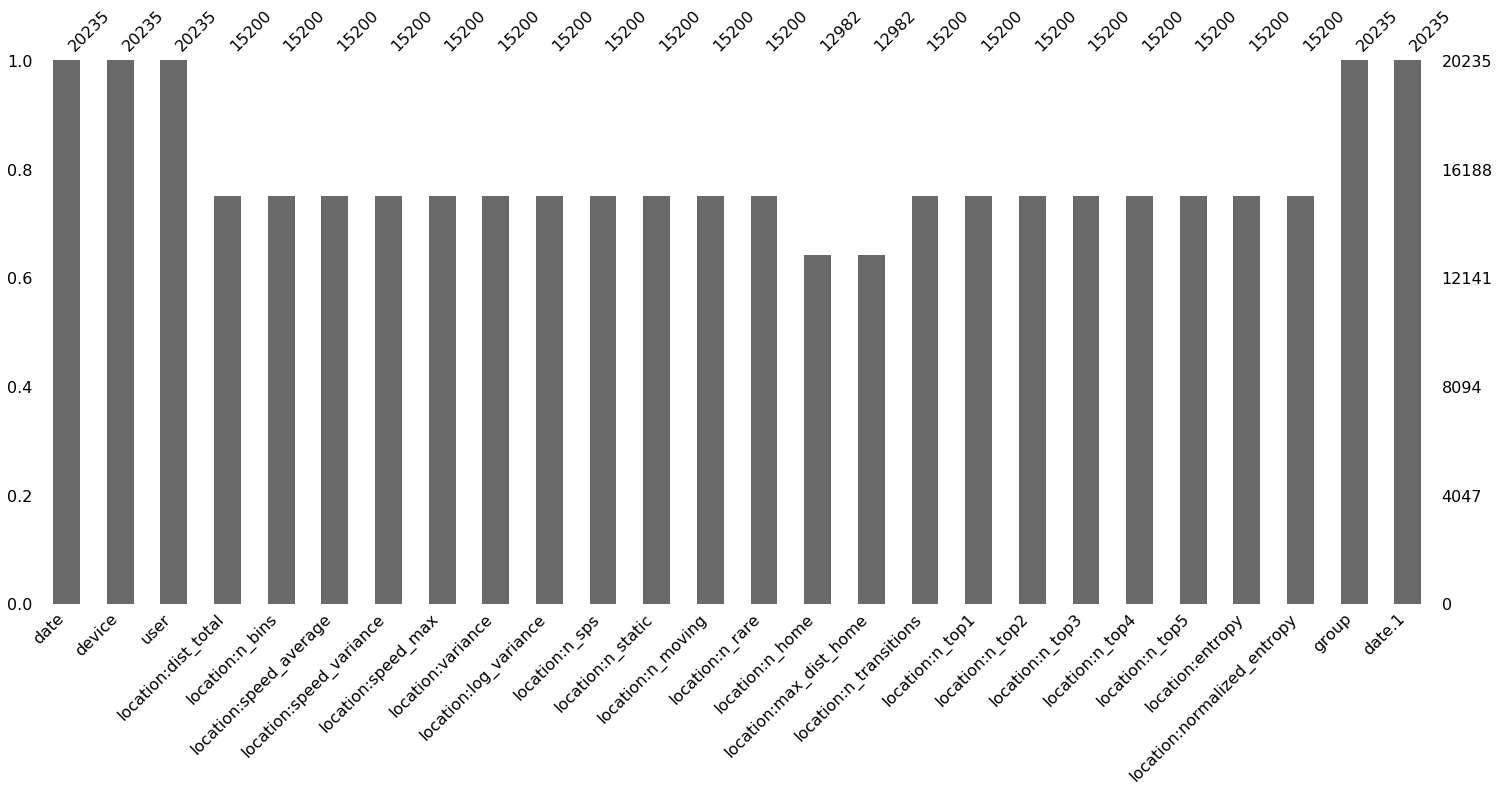

In [45]:
#!pip install missingno
import missingno as msno
import seaborn as sns

msno.bar(loc_df)

In [46]:
uindex = loc_df.copy().set_index("user")
# msno.matrix(uindex)
uindex

,date,device,location:dist_total,location:n_bins,location:speed_average,location:speed_variance,location:speed_max,location:variance,location:log_variance,location:n_sps,...,location:n_transitions,location:n_top1,location:n_top2,location:n_top3,location:n_top4,location:n_top5,location:entropy,location:normalized_entropy,group,date.1
user,,,,,,,,,,,,,,,,,,,,,
_swxQrt999Wh,2020-03-05,1YfNysXDlFgA,71.781959,35.0,0.094921,0.081324,1.346408,2.283467e-09,-19.897571,1.0,...,0.0,31.0,0.0,0.0,0.0,0.0,0.000000,0.000000,mmm-bpd,0
_swxQrt999Wh,2020-03-06,1YfNysXDlFgA,28648.370691,33.0,1.658357,11.305301,13.619089,3.841770e-03,-5.561822,1.0,...,2.0,13.0,5.0,0.0,0.0,0.0,0.000000,0.000000,mmm-bpd,1
_swxQrt999Wh,2020-03-07,1YfNysXDlFgA,61571.901456,94.0,3.308958,50.263543,26.685600,2.970338e-02,-3.516494,2.0,...,2.0,16.0,7.0,1.0,0.0,0.0,2.772589,4.000000,mmm-bpd,2
_swxQrt999Wh,2020-03-08,1YfNysXDlFgA,36131.548273,102.0,1.664093,15.883845,21.779348,9.015095e-03,-4.708855,1.0,...,1.0,16.0,3.0,0.0,0.0,0.0,0.000000,0.000000,mmm-bpd,3
_swxQrt999Wh,2020-03-09,1YfNysXDlFgA,29043.869031,39.0,1.234567,6.738450,10.709632,3.879500e-03,-5.552049,1.0,...,2.0,19.0,3.0,0.0,0.0,0.0,0.000000,0.000000,mmm-bpd,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JRmdtSaUsFUc,2021-12-31,zL2u8PjLTiEp,21629.340298,86.0,1.434593,5.131924,13.150000,5.752862e-04,-7.460643,1.0,...,2.0,13.0,4.0,0.0,0.0,0.0,0.000000,0.000000,mmm-control,4363
JRmdtSaUsFUc,2022-01-01,zL2u8PjLTiEp,2822.835820,84.0,1.139881,1.670515,7.900000,1.560505e-07,-15.673086,1.0,...,0.0,12.0,0.0,0.0,0.0,0.0,0.000000,0.000000,mmm-control,4364
JRmdtSaUsFUc,2022-01-02,zL2u8PjLTiEp,1916.094612,68.0,1.035735,0.773663,4.290000,1.008176e-07,-16.109953,1.0,...,0.0,17.0,0.0,0.0,0.0,0.0,0.000000,0.000000,mmm-control,4365


,user,group,location:dist_total
0,_swxQrt999Wh,mmm-bpd,0.946612
1,IZr3eFPWcYod,mmm-control,0.928375
2,vC2-2ajT7-1L,mmm-mdd,0.923077
3,U5cKPUTMu0fs,mmm-mdd,0.914286
4,RazDc_79nWZc,mmm-mdd,0.908257
...,...,...,...
114,G96iHU6Pr69i,mmm-control,0.000000
115,lzCmb_dbsPmO,mmm-control,0.000000
116,EsgBr1bwAc8a,mmm-mdd,0.000000
117,QvjcDKzUYGbN,mmm-control,0.000000


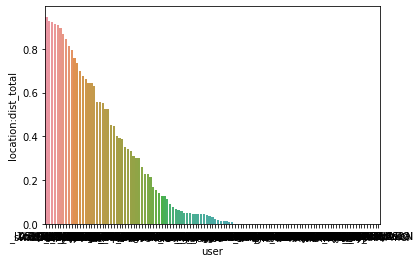

In [3]:
# Calculate the proportion of missing data by 'user' and 'group'
missing_proportion = (
    loc_df.groupby(["user", "group"])
    .apply(lambda x: x.isnull().mean())["location:dist_total"]
    .sort_values(ascending=False)
    .reset_index()
)

# Adjust display options
pd.set_option("display.max_rows", 50)  # Adjust as needed
sns.barplot(y=missing_proportion["location:dist_total"], x=missing_proportion.user)
missing_proportion

In [43]:
missing_proportion[missing_proportion["location:dist_total"] > 0.2]

KeyError: 'location:dist_total'

In [5]:
import sys

sys.path.append("../")
from config import PATHS
import niimpy
import pandas as pd

loc_df = niimpy.read_sqlite(
    PATHS["mmm-control"]["location"], table="awarelocation", tz="Europe/Helsinki"
)

In [33]:
sample = loc_df[
    loc_df.user.isin(["OP_J184Pjo-u", "o67VPudEvTUh", "5DWiLmu6c6u7"])
].reset_index()
sample["timestamp"] = sample["time"].astype(int)
sample["timestamp"] = sample["timestamp"] * 1000
sample.rename(columns={"device": "device_id"}, inplace=True)

sample.to_csv("locations.csv", index=False, quotechar='"')

In [42]:
rapids_loc_df = pd.read_csv("all_sensor_features.csv", index_col=0).reset_index()
missing_proportion_rapid = (
    rapids_loc_df.groupby(["pid"])
    .apply(lambda x: x.isnull().mean())["phone_locations_doryab_timeathome"]
    .sort_values(ascending=False)
    .reset_index()
)

missing_proportion_rapid

,pid,phone_locations_doryab_timeathome
0,o67VPudEvTUh,0.876147
1,IZr3eFPWcYod,0.857143
2,OP_J184Pjo-u,0.083333
3,5DWiLmu6c6u7,0.015748


In [57]:
missing_proportion = (
    loc_df.groupby(["user", "group", "device"])
    .apply(lambda x: x.isnull().mean())["location:n_home"]
    .sort_values(ascending=False)
    .reset_index()
)

missing_proportion

,user,group,device,location:n_home
0,OP_J184Pjo-u,mmm-control,S08mmOEJ6FaK,0.991525
1,IZr3eFPWcYod,mmm-control,s6KkdJEABQZR,0.944904
2,o67VPudEvTUh,mmm-control,rdHOrfJCBB0q,0.924419
3,5DWiLmu6c6u7,mmm-control,VnPdoH5luUXu,0.635294


In [56]:
# loc_df[loc_df.device.isin(rapids_loc_df.pid.unique())]
rapids_loc_df.pid.unique()

array(['IZr3eFPWcYod', '5DWiLmu6c6u7', 'o67VPudEvTUh', 'OP_J184Pjo-u'],
      dtype=object)